In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/churn-modelling/Churn_Modelling.csv


In [2]:
df=pd.read_csv('/kaggle/input/churn-modelling/Churn_Modelling.csv')

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
#some visualization to get some insight info from thet data

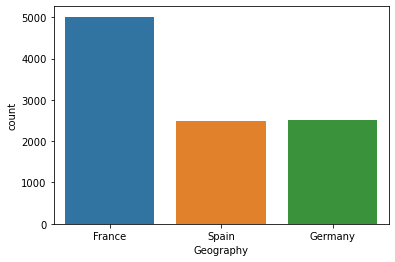

In [6]:
sns.countplot(df['Geography'])

In [7]:
#most people belongs to france in this dataset

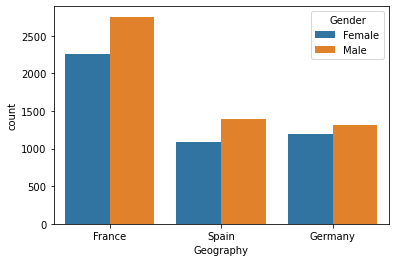

In [8]:
sns.countplot(x=df['Geography'],hue='Gender',data=df)

In [9]:
#here the no of males is greater than females

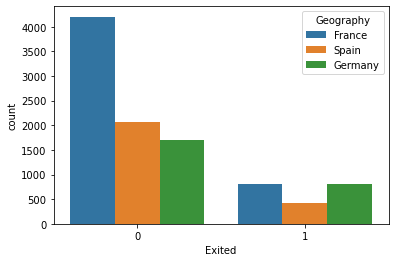

In [10]:
sns.countplot(x=df['Exited'],hue='Geography',data=df)

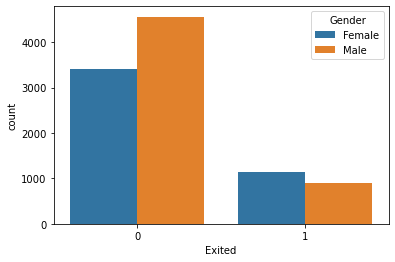

In [11]:
sns.countplot(x=df['Exited'],hue='Gender',data=df)

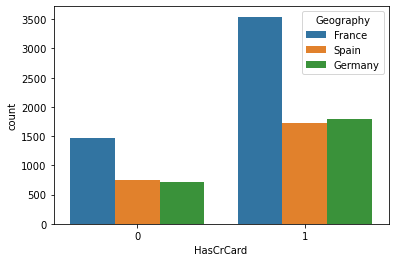

In [12]:
sns.countplot(x=df['HasCrCard'],hue='Geography',data=df)

In [13]:
#more people in france have credit card as comparison to others

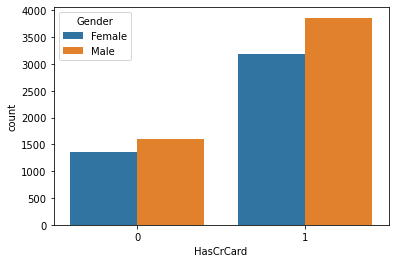

In [14]:
sns.countplot(x=df['HasCrCard'],hue='Gender',data=df)

In [15]:
#more males carry credit card as compare to females

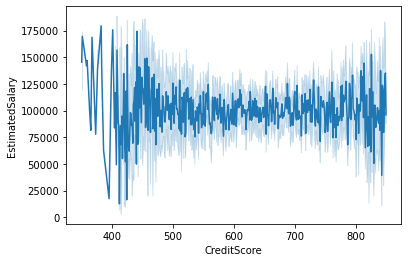

In [16]:
sns.lineplot(x=df['CreditScore'],y=df['EstimatedSalary'],data=df)

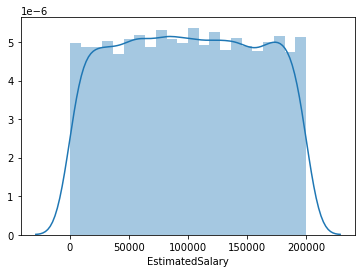

In [17]:
sns.distplot(df['EstimatedSalary'])

In [18]:
#next step is model building
#drop the unnecessary columns'
df=df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in list(df.columns):
    if df[i].dtype=='object':
        df[i]=le.fit_transform(df[i])

In [20]:
y=df['Exited']
x=df.drop(['Exited'],axis=1)

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
list_scores=[]
lr=LogisticRegression(max_iter=10000)
lr.fit(x_train,y_train)
pred_1=lr.predict(x_test)
score_1=accuracy_score(y_test,pred_1)
list_scores.append(score_1)

In [23]:
score_1

0.789

In [24]:
from sklearn.ensemble import RandomForestClassifier
rfr=RandomForestClassifier()
rfr.fit(x_train,y_train)
pred_2=rfr.predict(x_test)
score_2=accuracy_score(y_test,pred_2)
list_scores.append(score_2)

In [25]:
score_2

0.862

In [26]:
from sklearn.neighbors import KNeighborsClassifier
list_1=[]
for i in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    preds=knn.predict(x_test)
    scores=accuracy_score(y_test,preds)
    list_1.append(scores)

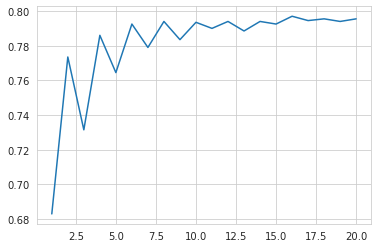

In [27]:
list_scores.append(max(list_1))
sns.set_style('whitegrid')
sns.lineplot(x=list(range(1,21)),y=list_1)

In [28]:
print(max(list_1))

0.797


In [29]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
pred_3=gbc.predict(x_test)
score_3=accuracy_score(y_test,pred_3)
list_scores.append(score_3)

In [30]:
score_3

0.864

In [31]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)
pred_4=svm.predict(x_test)
score_4=accuracy_score(y_test,pred_4)
list_scores.append(score_4)

In [32]:
score_4

0.7975

In [33]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
pred_5=xgb.predict(x_test)
score_5=accuracy_score(y_test,pred_5)
list_scores.append(score_5)

In [34]:
score_5

0.8515

In [35]:
list_models=['logistic regression','randomforest classifier','kneighbors classifier','gradientboosting','svm','xgboost']
list_scores


[0.789, 0.862, 0.797, 0.864, 0.7975, 0.8515]

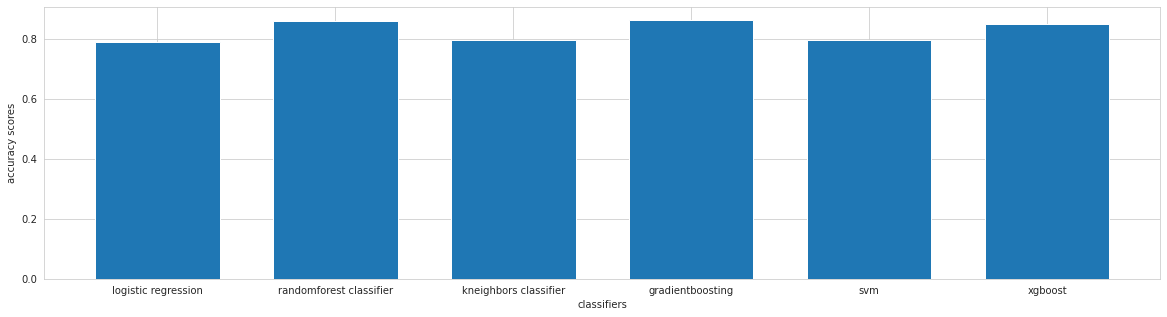

In [36]:
plt.figure(figsize=(20,5))
plt.bar(list_models,list_scores,width=0.7)
plt.xlabel('classifiers')
plt.ylabel('accuracy scores')
plt.show()